In [ ]:
%reload_ext nb_black

### 🥵 WARM UP 🥵

* A t-test is a ratio of what?
* What is the 'signal' of a t-test?
* What is the 'noise' of a t-test?
* What is the null hypothesis of a t-test?
* If a $p$ value is 0.00000001 what conlcusion will we likely draw?

----

In [18]:
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Statistics don't happen in a vaccuum

Setup:

> Our boss says we need to evaluate if there's a significant difference between our current website and a new website that would be very expensive to implement.  Boss says we have some data on what sales currently are and what they would be with the new website.  Again, this is a very expensive change to make. So the boss says there needs to a *significant difference*.

Your brain starts firing... "a significant difference? this is the day I can apply all my stats training".  Your fingers excitedly reach out for the keyboard to perform the t-test. You've been preparing for this your whole life.  The noises from your mechanical keys can be heard from all corners of the open office floor plan as you fervently type out the appropriate code:

In [3]:
# Sorry for breaking the immersion in the story line
# Just making up data.... next cell to attain statistics glory
np.random.seed(42)

og = pd.DataFrame({"sales": np.random.normal(200.0, 3, 1000), "group": "old"})
new = pd.DataFrame({"sales": np.random.normal(200.5, 3, 1000), "group": "new"})

sales = pd.concat((og, new))

In [4]:
sales.head()

,sales,group
0,201.490142,old
1,199.585207,old
2,201.943066,old
3,204.569090,old
4,199.297540,old


* Create a plot to compare the 2 groups of sales

* Perform all the steps for a t-test and report the result

In [7]:
old_sales = sales[sales.group == 'old']
new_sales = sales[sales.group == 'new']

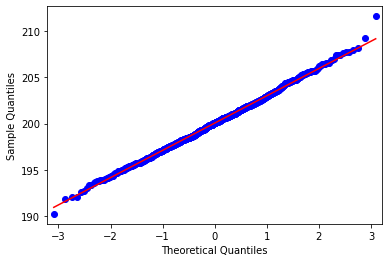

In [19]:
sm.qqplot(old_sales.sales, line='s')
plt.show()

### Statistical vs practical significance

Think about what *significant* means to a t-test and how this compares to how a normal person thinks about a *significant difference*.

* To a t-test, a significant difference of means is saying: "Assuming these 2 groups are identical, these observed means are unlikely."
* To a normal person, a significnat difference of means is saying: "These 2 means have a really really big gap between them."

These are not the same! One thing to note, these 2 perspectives agree on what's not a significant difference, they differ on what a significant difference is.

### Quantifying differences

Let's pretend were normal people and try to think like them.  If I tell you, "do this technique and youll have more connections on linkedin".  The 2 follow up questions on this statement could be:

1. Q: How many more connections?
  * A: 1
2. Q: Whats the technique?
  * A: add me as a connection

---

In the above t-test you performed.  Your boss cares doesn't care about a statistically significant difference of means, they care about a practically significant difference of means.  

If your t-test shows a difference.  You *need* to answer the follow-up question of "how big is the difference".  We'll answer this question with a confidence interval.

A confidence interval gives us some wiggle room in our response.  For example, if I asked you how long it takes to drive downtown you might say it takes about 20-30 minutes.  You're giving a range because there's things out of your control.

#### Confidence interval formula

A confidence interval for a difference of means will be:

$$signal \pm noise$$

These are the same signal & noise that appear in the t-test.  The signal is the difference of means, and the noise is a measure of the amount & variability of the evidence.

$$signal = \overline{x}_{1}-\overline{x}_{2}$$

$$noise = \sqrt{\frac{s_{1}^{2}}{n_{1}}+\frac{s_{2}^{2}}{n_{2}}}$$

What does it mean if our interval contains 0?

All that's missing is a way to indicate how confident our interval is.  In general, with large sample sizes we can stick with 1.96 as our number in this formula (1.96 relates to a 95% confidence interval).  With this addition, the formula for our 95% confidence interval will be:

$$signal \pm 1.96 * noise$$

* Translate this formula to python

In [21]:
x1 = old_sales.sales
x2 = new_sales.sales

In [22]:
#  difference of means
signal = x1.mean() - x2.mean()


noise = np.sqrt(x1.var() / x2.size + x2.var() / x2.size)



In [24]:
signal/noise

-4.935816340189631

In [25]:
#  confidence interval of 95%
#  using z score for 95% +/- 1.96
ci_lo = signal - 1.96 * noise
ci_hi = signal + 1.96 * noise

In [26]:
(ci_lo, ci_hi)

(-0.914417795686119, -0.3946072928746398)

According to our confidence interval, if we make the costly change in website.  The true boost in sales that we'll see is likely in the range of our 95% CI.

How do you advise your boss?

In [ ]:
# depends on scale of business and website traffic maybe

In [ ]:
#  more noise = larger confidence interval

### Choose your own adventure

1. Revisit marble race and calculate a confidence interval for the difference between blue and not blue?
* Revisit pairs exercise and calculate a confidence interval for 🐌s?
* Go through a new t-test & confidence interval example (below).
* Get into a more in depth discussion about where the number 1.96 comes from?
* Marble race to decide?

Question: Two speicies of iris are setosa and versicolor.  Is there a difference in sepal length between these w species?